# LEVEL 1

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READ IN THE CLEANED DATASET

In [17]:
df=pd.read_csv('cleaned_data.csv')
display(df)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# TASK 1: TOP CUISINES

QUESTIONS: 

1. Determine the top three most common cuisines in the dataset.
2. Calculate the percentage of restaurants that serve each of the top cuisines.



1. TOP 3 MOST COMMON CUISINES

In [18]:
# Replace null values in Cuisines column with empty string ('')
df['Cuisines'] = df['Cuisines'].fillna('')

# Split cuisines into a list
df['Cuisines'] = df['Cuisines'].str.split(', ')

split = df['Cuisines'].explode
print(split)

<bound method Series.explode of 0             [French, Japanese, Desserts]
1                               [Japanese]
2       [Seafood, Asian, Filipino, Indian]
3                        [Japanese, Sushi]
4                       [Japanese, Korean]
                       ...                
9546                             [Turkish]
9547     [World Cuisine, Patisserie, Cafe]
9548              [Italian, World Cuisine]
9549                     [Restaurant Cafe]
9550                                [Cafe]
Name: Cuisines, Length: 9551, dtype: object>


In [24]:
# Flatten the list and count occurrences
cuisine_counts = pd.Series([cuisine for sublist in df['Cuisines'] for cuisine in sublist]).value_counts()

# Get the top 3 most common cuisines
top_3_cuisines = cuisine_counts.head(3)
print(top_3_cuisines)

North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


2. PERCENTAGE OF RESTAURANTS THAT SERVE EACH OF THE TOP 3 CUISINES 

In [25]:
# Total number of restaurants
total_restaurants = len(df)

# Flatten the list and count occurrences
cuisine_counts = pd.Series([cuisine for sublist in df['Cuisines'] for cuisine in sublist]).value_counts()

# Occurrence of each cuisine
top_3_cuisines = cuisine_counts.head(3)

# Percentage for each cuisine
cuisine_percentages = (top_3_cuisines / total_restaurants) * 100 

# Round up to 2 decimal places
cuisine_percentages = cuisine_percentages. round(2)
print(cuisine_percentages)

North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


# TASK 2: CITY ANALYSIS

QUESTIONS:
1. Identify the city with the highest number of restaurants in the dataset.
2. Calculate the average rating for restaurants in each city.
3. Determine the city with the highest average rating.

1. CITY WITH HIGHEST NUMBER OF RESTAURANTS

In [152]:
# number of restaurants in each city
city_count=  df['City'].value_counts()

# city with highest number of restaurants
top_city = city_count.head(1)
print (f"The city with the highest number of restaurants is {top_city}.")

The city with the highest number of restaurants is City
New Delhi    5473
Name: count, dtype: int64.


2. AVERAGE RATING FOR RESTAURANTS IN EACH CITY


In [153]:
# Group by city and calculate average rating
average_ratings = df.groupby('City')['Aggregate rating'].mean()

# Round the result
average_ratings = average_ratings.round(1)
print(average_ratings)

City
Abu Dhabi          4.3
Agra               4.0
Ahmedabad          4.2
Albany             3.6
Allahabad          3.4
                  ... 
Weirton            3.9
Wellington City    4.2
Winchester Bay     3.2
Yorkton            3.3
stanbul            4.3
Name: Aggregate rating, Length: 141, dtype: float64


3. CITY WITH HIGHEST AVERAGE RATING

In [154]:
# City with highest average rating 
Highest_avg_rating = average_ratings.idxmax()
print(f" The city with the highest average rating is {Highest_avg_rating}.")

 The city with the highest average rating is Inner City.


# TASK 3 : PRICE DISTRIBUTION RANGE

QUESTIONS:
1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
2. Calculate the percentage of restaurants in each price range category.

1. BAR CHART SHOWING DISTRIBUTION OF PRICE RANGES AMONG THE RESTAURANTS

In [155]:
# Check the unique values in the 'Price range' column
df['Price range'].unique()

array([3, 4, 2, 1])

In [156]:
# Count occurrences of each price range
price_counts = df["Price range"].value_counts()
print(price_counts)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


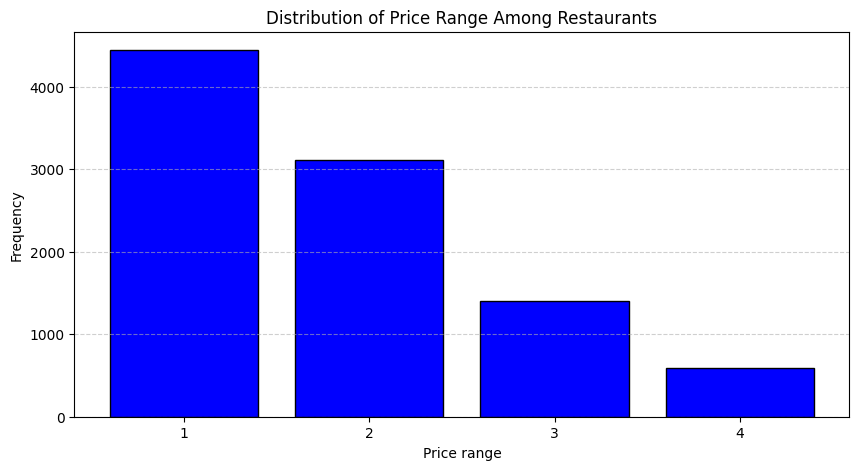

In [157]:
# Plot bar chart
plt.figure(figsize= (10, 5))
plt.bar( price_counts.index, price_counts.values, color="blue", edgecolor="black")

# Labels and title
plt.xlabel("Price range")
plt.ylabel("Frequency")
plt.title("Distribution of Price Range Among Restaurants")
plt.grid(axis= 'y', linestyle= '--', alpha= 0.6)

# Ensure x-axis ticks match the price range categories
plt.xticks(price_counts.index)

# Show the plot
plt.show()

2. PERCENTAGE OF RESTAURANTS IN EACH PRICE CATEGORY

In [158]:
# Count occurrences of each price range
price_counts = df["Price range"].value_counts()

# Total number of restaurants
total_restaurants = len(df)

# Calculate percentage
price_percentage = (price_counts / total_restaurants) * 100

# Display results
print(f"The percentage of restaurants in each { price_percentage.round(2)} %")  


The percentage of restaurants in each Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64 %


 # TASK 4: ONLINE DELIVERY

QUESTION :
1. Determine the percentage of restaurants that offer online delivery.
2. Compare the average ratings of restaurants with and without online delivery.

1. PERCENTAGE OF RESTURANTS THAT OFFER ONLINE DELIVERY

In [159]:
# Check the unique values in the 'Has Online Delivery' column
print(df['Has Online delivery'].unique())

['No' 'Yes']


In [160]:
# Filter the restaurants that offer online delivery
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]
print(online_delivery_count)

2451


In [161]:
# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

# Round the result
online_delivery_percentage = round(online_delivery_percentage, 2)
print(f"The percentage of restaurants that offer online delivery is {online_delivery_percentage}%.")

The percentage of restaurants that offer online delivery is 25.66%.


2. COMPARISM OF AVERAGE RATINGS OF RESTAURANTS WITH OR WITHOUT ONLINE DELIVERY

In [162]:
# Group by 'online delivery and calculate the mean rating
average_ratings_comparism = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print('Average ratings comparism:')
print(average_ratings_comparism)

Average ratings comparism:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
